<h1> Spotify Recommender System Content-Based

Proyek ini bertujuan untuk membangun sebuah sistem rekomendasi lagu sederhana menggunakan metode Content-Based Filtering. Sistem ini akan merekomendasikan lagu berdasarkan kemiripan fitur audio antar lagu. Data yang digunakan adalah sekumpulan lagu dari Spotify yang telah diberi label "liked" (suka) dan "disliked" (tidak suka). Kemiripan antar lagu dihitung menggunakan metrik Cosine Similarity setelah melakukan scaling pada fitur-fitur audio.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/SpotifyRecommendation/data.csv')
df.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


<h1>Exploratory Data Analysis & Cleaning

1. df.info(): Untuk memberikan ringkasan tentang DataFrame, termasuk:

    - Jumlah baris (entries): 195.

    - Jumlah kolom (columns): 14.

    - Nama dan tipe data (Dtype) setiap kolom.

    - Jumlah nilai non-null di setiap kolom. Dari output ini, terlihat bahwa tidak ada nilai yang hilang (missing values) dalam dataset.

2. df.duplicated().sum(): Memeriksa apakah ada baris data yang terduplikasi. Hasilnya 0, yang menandakan semua baris data bersifat unik.

3. df.isnull().sum(): Memastikan bahwa tidak ada nilai null di setiap kolom.

4. df.describe(): Memberikan ringkasan statistik deskriptif untuk semua kolom numerik, seperti count (jumlah), mean (rata-rata), std (standar deviasi), min (nilai minimum), max (nilai maksimum), dan nilai kuartil (25%, 50%, 75%). Ini sangat berguna untuk memahami rentang nilai dari setiap fitur audio.

5. df.shape: Menampilkan dimensi dari DataFrame (jumlah baris, jumlah kolom), yaitu (195, 14).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0
instrumentalness,0
liveness,0
valence,0


In [ ]:
df.dtypes.value_counts()

,count
float64,9
int64,5


In [ ]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


In [ ]:
df.shape

(195, 14)

<h1>Data Visualization

1. Correlation Matrix (heatmap):

    - Saya menghitung matriks korelasi menggunakan df.corr(). 
    - Kemudian, Anda menggunakan seaborn.heatmap untuk memvisualisasikan matriks ini. Heatmap ini menunjukkan bagaimana setiap fitur berhubungan satu sama lain. Nilai yang mendekati 1 atau -1 menunjukkan korelasi yang kuat.
    - Dari plot ini, bisa terlihat korelasi positif yang kuat antara energy dan loudness.

2. Distribusi Fitur (boxplot dan histplot):

    - Anda membuat plot untuk setiap fitur menggunakan boxplot dan histplot untuk melihat distribusinya.
    - Box plots berguna untuk mengidentifikasi outlier dan melihat sebaran data (median, kuartil).
    - Histograms menunjukkan frekuensi dari setiap rentang nilai, memberikan gambaran visual tentang bentuk distribusi fitur.

3. Distribusi Target (countplot):

    - Saya menggunakan sns.countplot pada kolom liked untuk melihat distribusi lagu yang disukai dan tidak disukai.
    - Hasilnya menunjukkan bahwa dataset cukup seimbang, dengan 100 lagu "liked" (label 1) dan 95 lagu "disliked" (label 0).

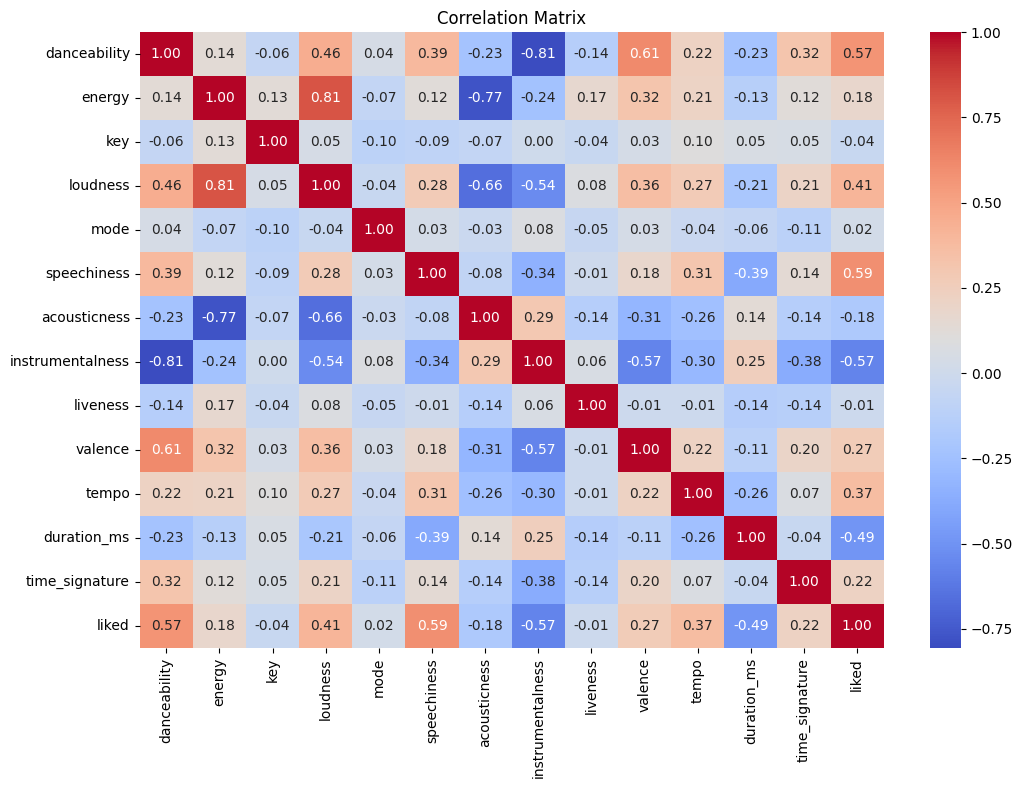

In [ ]:
corr = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

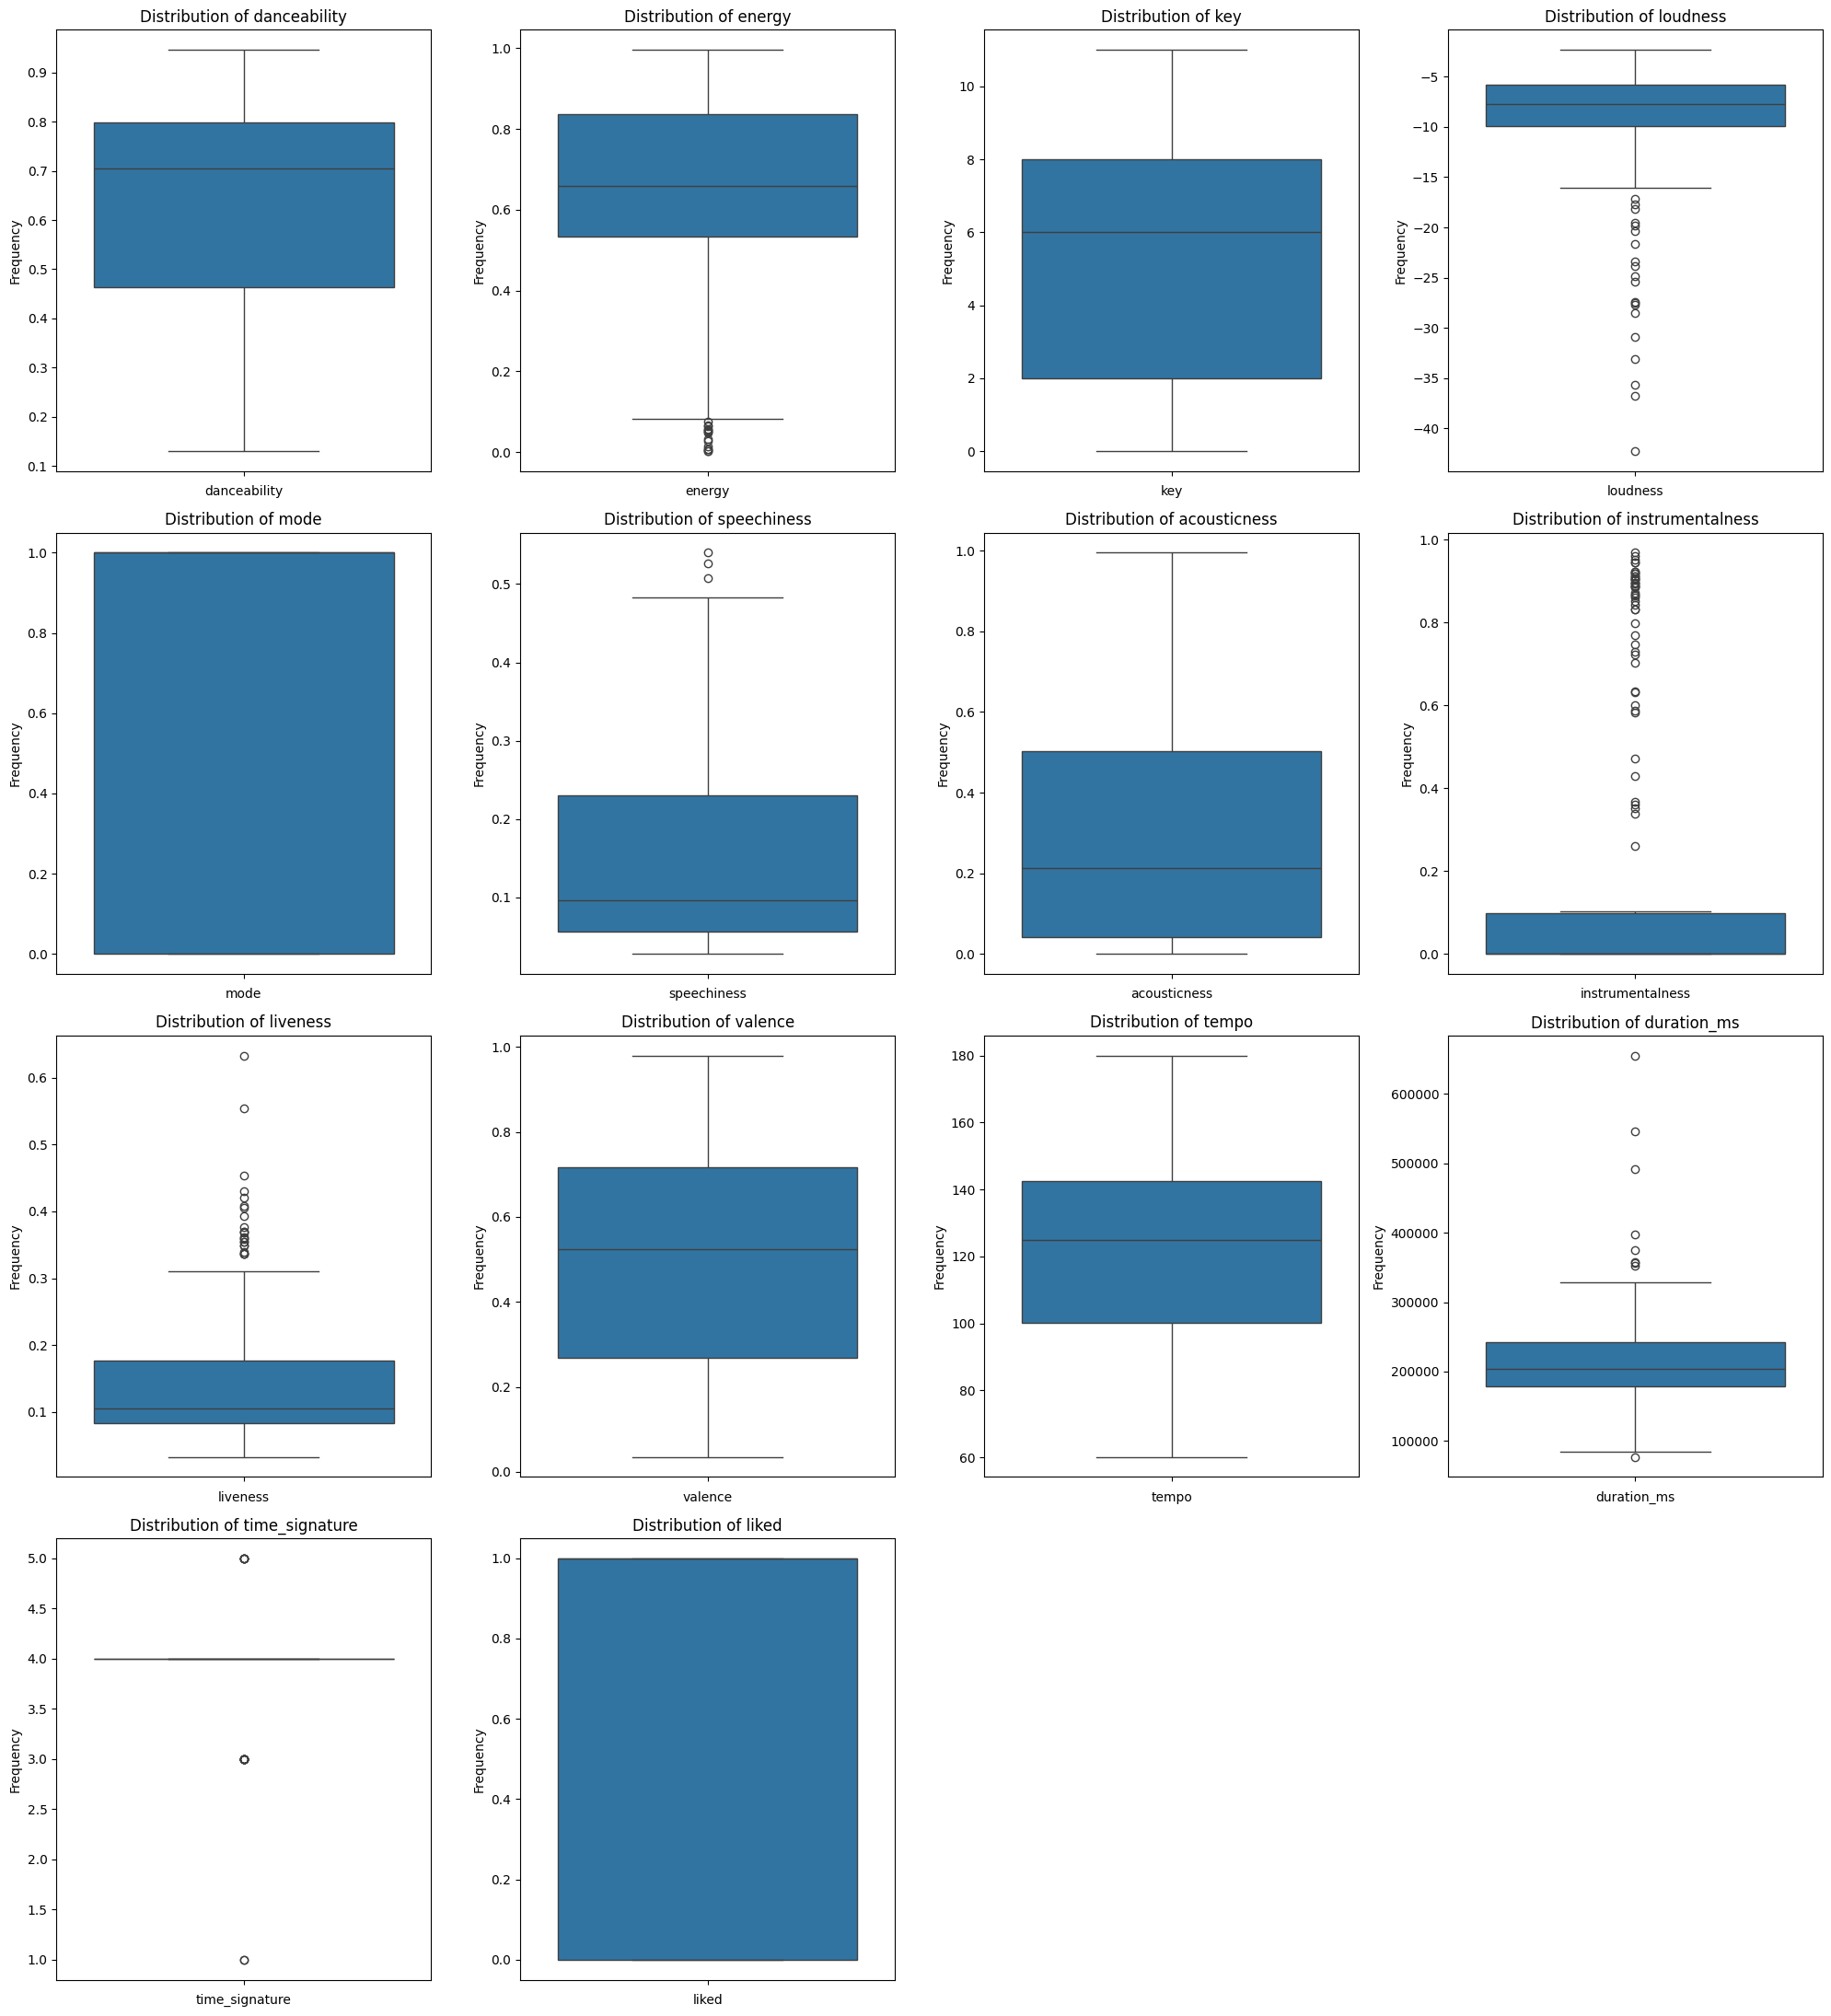

In [ ]:
plt.figure(figsize=(20, 22))

num_columns = len(df.columns)
num_rows = (num_columns - 1) // 4 + 1

for i, column in enumerate(df.columns, start=1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(data=df[column])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f"Distribution of {column}")

plt.tight_layout()

plt.show()

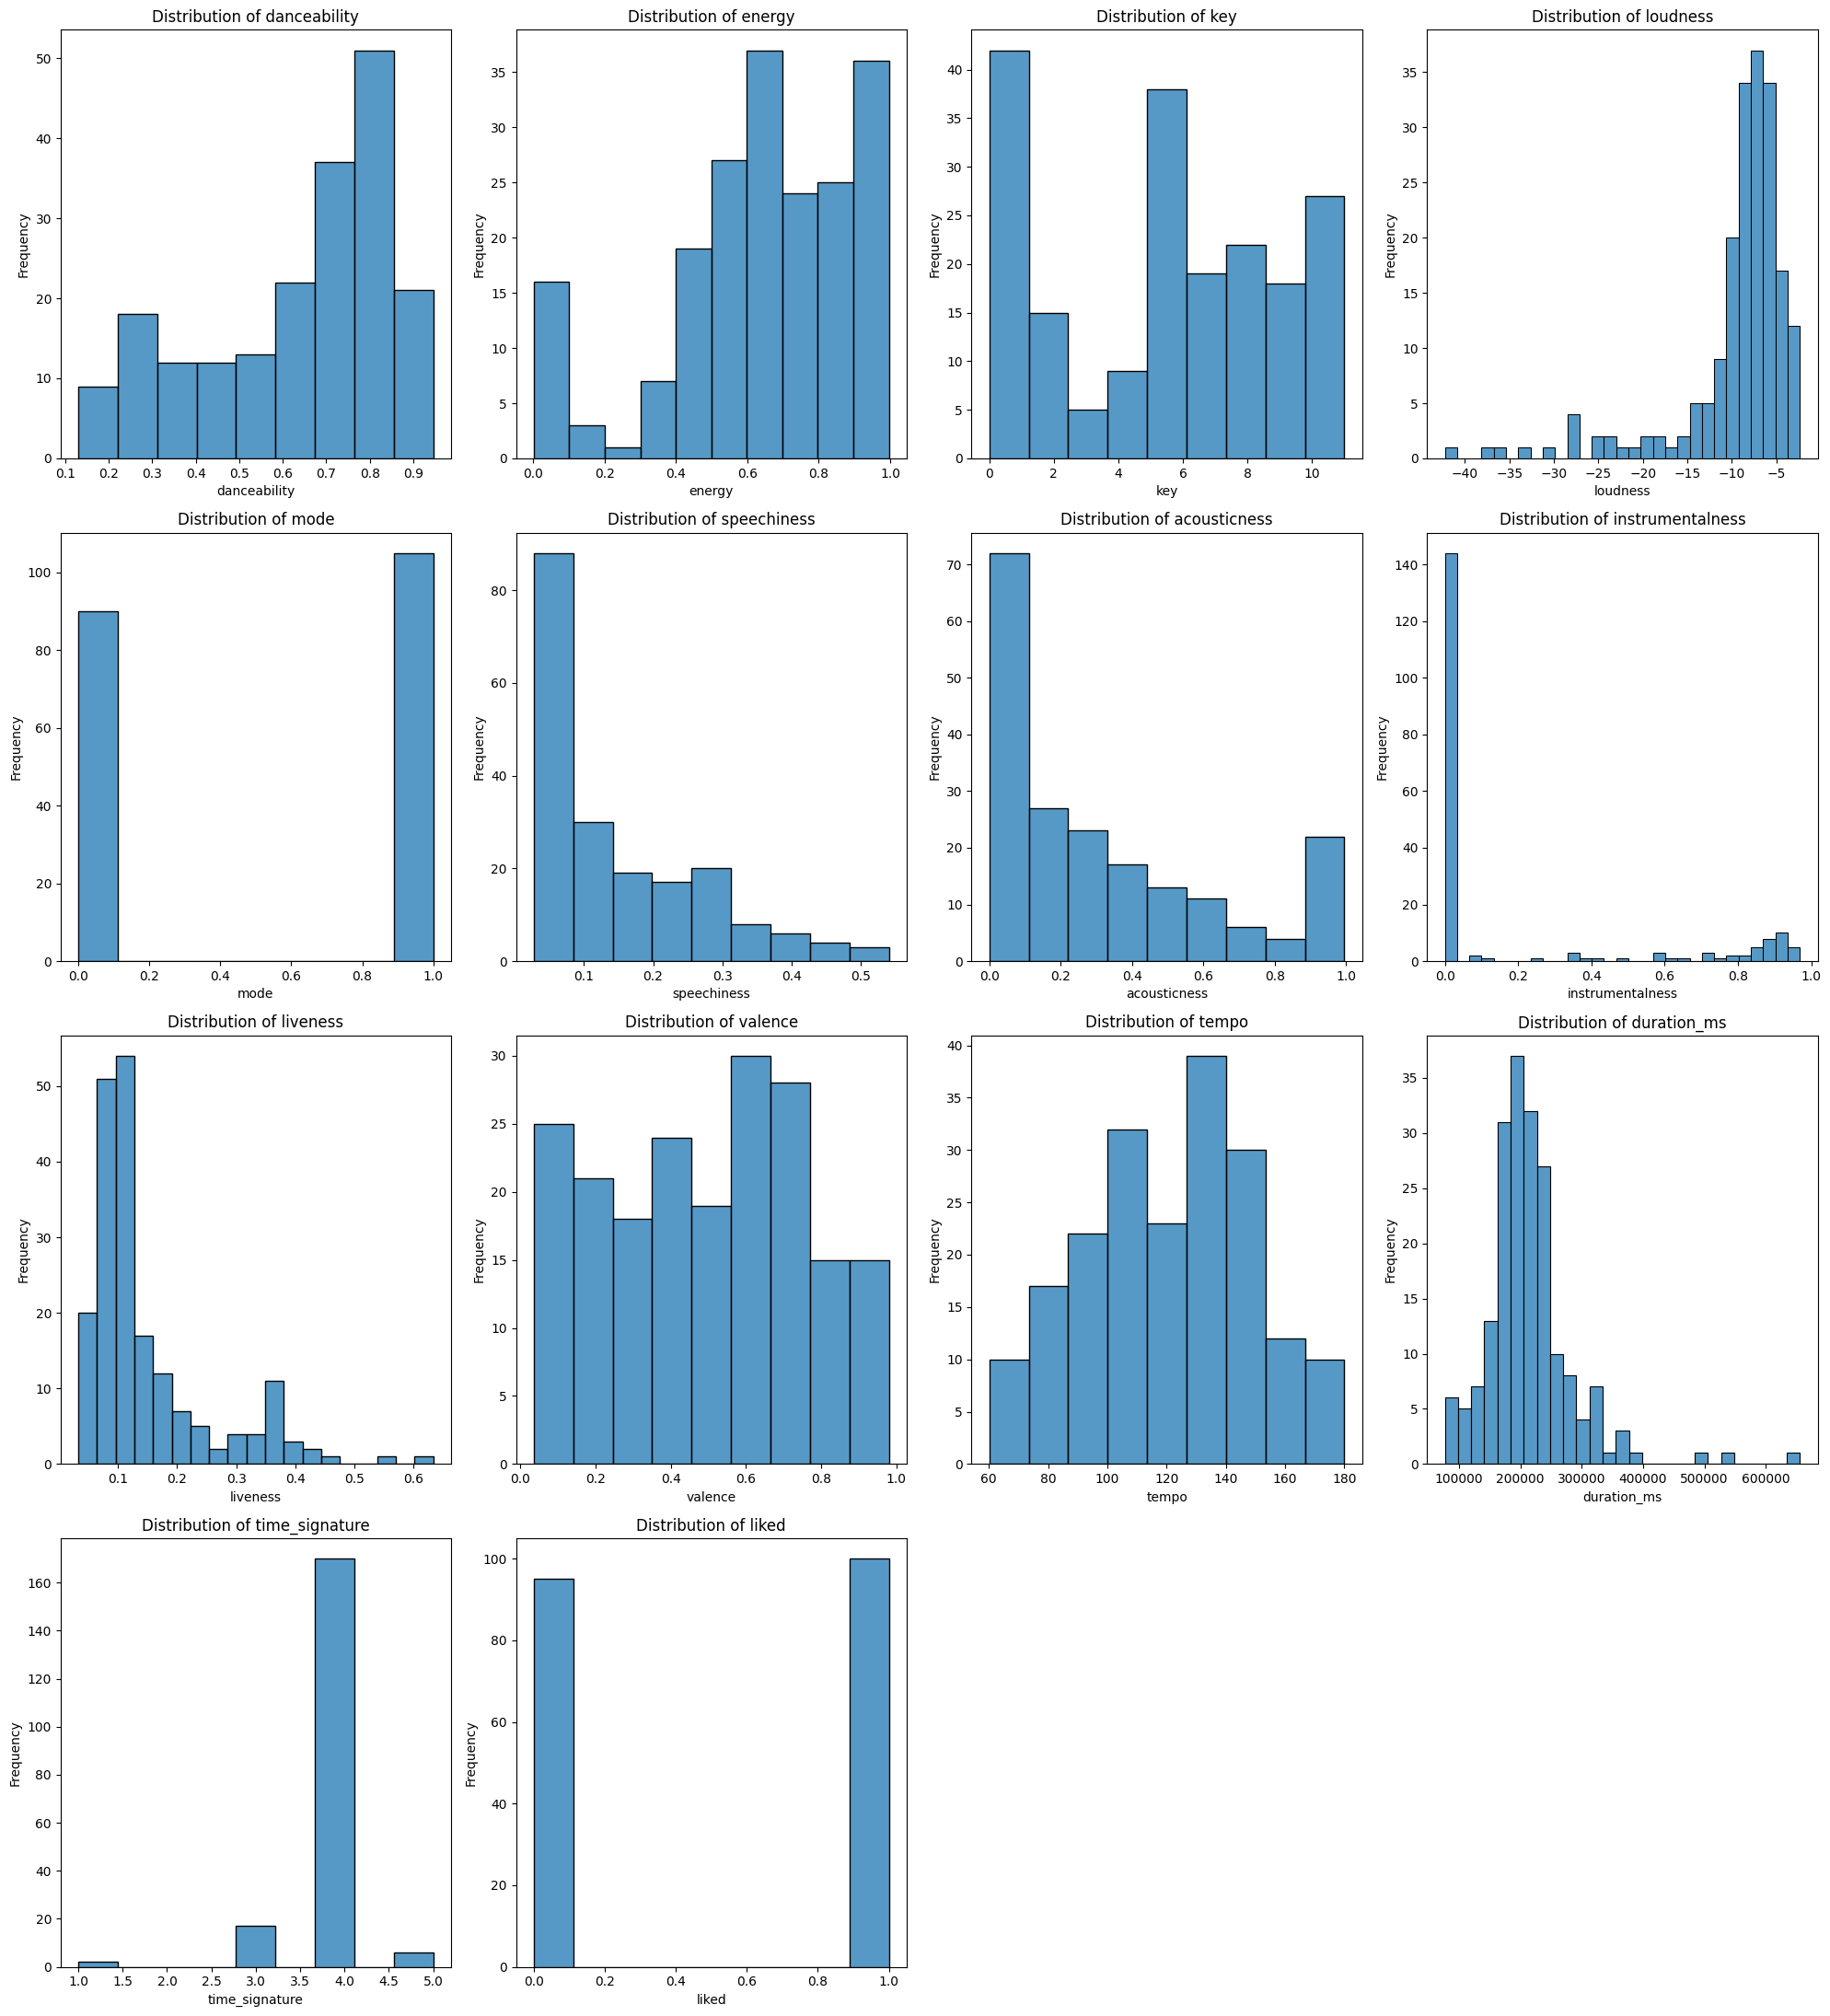

In [ ]:
plt.figure(figsize=(20, 22))

num_columns = len(df.columns)
num_rows = (num_columns - 1) // 4 + 1

for i, column in enumerate(df.columns, start=1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(data=df[column])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f"Distribution of {column}")

plt.tight_layout()

plt.show()

Number of liked songs: 100
Number of disliked songs: 95
Ratio of liked songs: 0.51
Ratio of disliked songs: 0.49


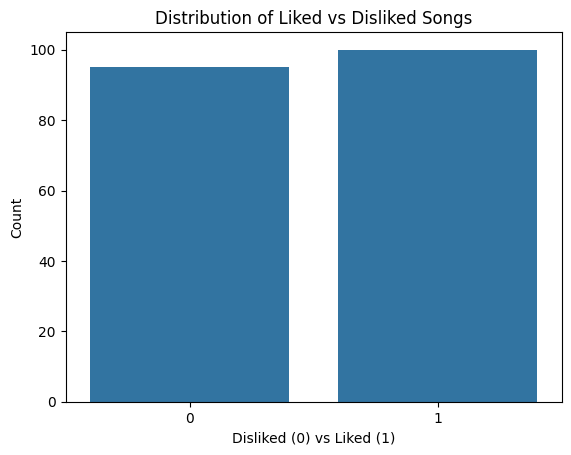

In [ ]:
liked_count = df['liked'].value_counts()[1]
disliked_count = df['liked'].value_counts()[0]

liked_ratio = liked_count / len(df)
disliked_ratio = disliked_count / len(df)

print(f"Number of liked songs: {liked_count}")
print(f"Number of disliked songs: {disliked_count}")
print(f"Ratio of liked songs: {liked_ratio:.2f}")
print(f"Ratio of disliked songs: {disliked_ratio:.2f}")

sns.countplot(x='liked', data=df)
plt.title('Distribution of Liked vs Disliked Songs')
plt.xlabel('Disliked (0) vs Liked (1)')
plt.ylabel('Count')
plt.show()

<h1>Data Preparation for Recommendation

Karena data yang digunakan berada di directory yang terpisah maka saya memutuskan untuk menggabungkannya.

1. Load Data JSON:

    - Data fitur audio untuk lagu yang disukai (good.json) dan tidak disukai (dislike.json) dimuat menggunakan library json.
    - Data ini kemudian diubah menjadi pandas DataFrame (liked_songs dan disliked_songs).

2. Penambahan Label dan Nama Lagu:

    - Kolom liked ditambahkan ke masing-masing DataFrame. liked_songs diberi nilai 1, dan disliked_songs diberi nilai 0.
    - Kolom track_name ditambahkan dari data yes_ids dan no_ids untuk mempermudah identifikasi lagu saat memberikan rekomendasi.

3. Penggabungan Data:

    - Kedua DataFrame tersebut digabungkan menjadi satu DataFrame besar bernama combined_df menggunakan pd.concat. DataFrame inilah yang akan menjadi dasar untuk sistem rekomendasi.

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/MachineLearning/SpotifyRecommendation')

from yes import yes_ids
from no import no_ids

In [ ]:
disliked_tracks = pd.DataFrame([{'track_id': item['track']['id'], 'track_name': item['track']['name']} for item in no_ids['items']])
liked_tracks = pd.DataFrame([{'track_id': item['track']['id'], 'track_name': item['track']['name']} for item in yes_ids['items']])

In [ ]:
liked_songs['track_name'] = liked_tracks['track_name']
disliked_songs['track_name'] = disliked_tracks['track_name']

In [ ]:
combined_df = pd.concat([liked_songs, disliked_songs], axis=0)

In [ ]:
import json
with open('/content/drive/MyDrive/MachineLearning/SpotifyRecommendation/good.json', 'r') as f:
    liked_data = json.load(f)

with open('/content/drive/MyDrive/MachineLearning/SpotifyRecommendation/dislike.json', 'r') as f:
    disliked_data = json.load(f)

In [ ]:
liked_songs = pd.DataFrame(liked_data['audio_features'])
disliked_songs = pd.DataFrame(disliked_data['audio_features'])

liked_songs['liked'] = 1
disliked_songs['liked'] = 0

In [ ]:
sorted_combined_df = combined_df.sort_values(by='danceability').reset_index(drop=True)

In [ ]:
liked_songs['track_name'] = liked_tracks['track_name']
disliked_songs['track_name'] = disliked_tracks['track_name']

In [ ]:
print(f"Number of Liked Songs: {liked_songs.shape[0]}")
print(f"Number of Disliked Songs: {disliked_songs.shape[0]}")
print(f"Number of Rows in Combined Dataframe: {sorted_combined_df.shape[0]}")

Number of Liked Songs: 100
Number of Disliked Songs: 95
Number of Rows in Combined Dataframe: 195


In [ ]:
liked_songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,liked,track_name
0,0.749,0.839,6,-4.847,1,0.297,0.0867,0.000000,0.2040,0.804,172.068,audio_features,55mcupbf7cIsuCEVAuTJVk,spotify:track:55mcupbf7cIsuCEVAuTJVk,https://api.spotify.com/v1/tracks/55mcupbf7cIs...,https://api.spotify.com/v1/audio-analysis/55mc...,111000,4,1,OVGTC - Star Wars remix
1,0.573,0.581,10,-9.026,0,0.339,0.7530,0.000001,0.1300,0.351,76.506,audio_features,57RtLWT7IpugV0yi5bsxJk,spotify:track:57RtLWT7IpugV0yi5bsxJk,https://api.spotify.com/v1/tracks/57RtLWT7Ipug...,https://api.spotify.com/v1/audio-analysis/57Rt...,169347,4,1,Rêves de môme
2,0.800,0.719,7,-6.262,1,0.234,0.1090,0.000000,0.0580,0.815,143.975,audio_features,5VyfAfp2Yt3qaeuvq55ll3,spotify:track:5VyfAfp2Yt3qaeuvq55ll3,https://api.spotify.com/v1/tracks/5VyfAfp2Yt3q...,https://api.spotify.com/v1/audio-analysis/5Vyf...,230854,4,1,4 millions
3,0.778,0.632,8,-6.415,1,0.125,0.0404,0.000000,0.0912,0.827,140.951,audio_features,3eWHY75nDgte70hh5yf4UW,spotify:track:3eWHY75nDgte70hh5yf4UW,https://api.spotify.com/v1/tracks/3eWHY75nDgte...,https://api.spotify.com/v1/audio-analysis/3eWH...,224029,4,1,Bandana mauve
4,0.797,0.852,8,-5.202,1,0.241,0.0555,0.000024,0.0536,0.480,136.035,audio_features,2UwrB6Ge6mPfUV8yGvAfX7,spotify:track:2UwrB6Ge6mPfUV8yGvAfX7,https://api.spotify.com/v1/tracks/2UwrB6Ge6mPf...,https://api.spotify.com/v1/audio-analysis/2Uwr...,102353,4,1,Brothers (Remix Rilès)


In [ ]:
disliked_songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,liked,track_name
0,0.357,0.980,6,-6.835,1,0.0790,0.000052,0.843,0.0768,0.368,96.969,audio_features,4pFC6tuWErxbO61oFFq3BQ,spotify:track:4pFC6tuWErxbO61oFFq3BQ,https://api.spotify.com/v1/tracks/4pFC6tuWErxb...,https://api.spotify.com/v1/audio-analysis/4pFC...,242760,4,0,Hammer Smashed Face
1,0.446,0.977,10,-5.036,0,0.0781,0.000535,0.472,0.1050,0.339,172.059,audio_features,6V3SNkvi4BnfmZU0j7s9TQ,spotify:track:6V3SNkvi4BnfmZU0j7s9TQ,https://api.spotify.com/v1/tracks/6V3SNkvi4Bnf...,https://api.spotify.com/v1/audio-analysis/6V3S...,284400,4,0,Scourge of Iron
2,0.291,0.980,1,-5.138,1,0.1530,0.001270,0.091,0.1020,0.257,79.792,audio_features,1Ds58cpyJzL0YTKk02vh1C,spotify:track:1Ds58cpyJzL0YTKk02vh1C,https://api.spotify.com/v1/tracks/1Ds58cpyJzL0...,https://api.spotify.com/v1/audio-analysis/1Ds5...,270920,4,0,Evisceration Plague
3,0.462,0.974,1,-5.820,1,0.0816,0.000029,0.723,0.0751,0.399,107.877,audio_features,77QKNMGwlnzxsTZPYfByMu,spotify:track:77QKNMGwlnzxsTZPYfByMu,https://api.spotify.com/v1/tracks/77QKNMGwlnzx...,https://api.spotify.com/v1/audio-analysis/77QK...,186576,3,0,Necrogenic Resurrection
4,0.338,0.988,8,-7.290,0,0.0865,0.000083,0.833,0.0377,0.449,99.046,audio_features,3bQoMbPYOvvseHaSOWAQ3Q,spotify:track:3bQoMbPYOvvseHaSOWAQ3Q,https://api.spotify.com/v1/tracks/3bQoMbPYOvvs...,https://api.spotify.com/v1/audio-analysis/3bQo...,221960,4,0,I Cum Blood


In [ ]:
sorted_combined_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,liked,track_name
0,0.130,0.9470,8,-5.888,1,0.0950,0.000024,0.368,0.0453,0.3340,60.631,audio_features,5WGvXmLt6acluR7TfhlHUH,spotify:track:5WGvXmLt6acluR7TfhlHUH,https://api.spotify.com/v1/tracks/5WGvXmLt6acl...,https://api.spotify.com/v1/audio-analysis/5WGv...,272995,4,0,Inhumane Harvest
1,0.138,0.9910,8,-5.661,1,0.1750,0.000015,0.831,0.3370,0.0718,94.443,audio_features,0HPmWGyYJ0xP1DYUWk8Fwm,spotify:track:0HPmWGyYJ0xP1DYUWk8Fwm,https://api.spotify.com/v1/tracks/0HPmWGyYJ0xP...,https://api.spotify.com/v1/audio-analysis/0HPm...,244239,1,0,Bound and Burned
2,0.166,0.0551,9,-19.494,0,0.0520,0.976000,0.635,0.1190,0.1430,176.616,audio_features,3QPPP2YozZ5xmMmpDB3c9n,spotify:track:3QPPP2YozZ5xmMmpDB3c9n,https://api.spotify.com/v1/tracks/3QPPP2YozZ5x...,https://api.spotify.com/v1/audio-analysis/3QPP...,206520,3,0,Hallelujah (Arr. Cello & Strings)
3,0.184,0.9740,8,-6.237,0,0.1060,0.000023,0.886,0.2410,0.3300,93.771,audio_features,107S1KOprUaRQqfI9nugxv,spotify:track:107S1KOprUaRQqfI9nugxv,https://api.spotify.com/v1/tracks/107S1KOprUaR...,https://api.spotify.com/v1/audio-analysis/107S...,257390,3,0,Condemnation Contagion
4,0.191,0.0582,8,-25.398,1,0.0578,0.961000,0.890,0.0941,0.0454,132.614,audio_features,3weNRklVDqb4Rr5MhKBR3D,spotify:track:3weNRklVDqb4Rr5MhKBR3D,https://api.spotify.com/v1/tracks/3weNRklVDqb4...,https://api.spotify.com/v1/audio-analysis/3weN...,357707,1,0,Nuvole Bianche


<h1>Building the Recommendation System

1. Feature Scaling (StandardScaler):

    - Sebelum menghitung kemiripan, fitur-fitur audio di-scale menggunakan StandardScaler.
    - Langkah ini penting karena fitur seperti duration_ms memiliki skala yang jauh lebih besar daripada fitur seperti danceability (0-1). Scaling memastikan setiap fitur memiliki bobot yang setara dalam perhitungan kemiripan.

2. Cosine Similarity:

    - cosine_similarity dari sklearn digunakan pada data yang telah di-scale.
    - Metrik ini menghitung "jarak kosinus" antara setiap pasang lagu. Nilai yang mendekati 1 berarti lagu-lagu tersebut sangat mirip berdasarkan fitur audionya, sedangkan nilai yang mendekati 0 berarti mereka tidak mirip.

3. Recommendation Function (get_recommendations), Steps:

    - Mencari index dari lagu yang dimasukkan sebagai input.
    - Mengambil baris skor kemiripan untuk lagu tersebut dari matriks cosine_sim.
    - Mengurutkan skor kemiripan dari yang tertinggi ke terendah.
    - Mengambil top_n lagu dengan skor tertinggi (setelah mengabaikan lagu input itu sendiri, yang skornya pasti 1.0).
    - Mengembalikan DataFrame yang berisi lagu-lagu yang direkomendasikan.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

combined_songs = pd.concat([liked_songs, disliked_songs], axis=0).reset_index(drop=True)

audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                  'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo', 'duration_ms']

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_songs[audio_features])

cosine_sim = cosine_similarity(scaled_features, scaled_features)

In [ ]:
def get_recommendations(track_name, cosine_sim_matrix, combined_songs, top_n=5):
    idx = combined_songs[combined_songs['track_name'] == track_name].index[0]
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    song_indices = [i[0] for i in sim_scores]
    return combined_songs.iloc[song_indices]

In [ ]:
# Get recommendations for a liked song
liked_song_name = liked_songs['track_name'].iloc[0]
recommendations = get_recommendations(liked_song_name, cosine_sim, combined_songs)
print(f"Recommendations for '{liked_song_name}':")
print(recommendations[['track_name', 'liked']])

Recommendations for 'OVGTC - Star Wars remix':
                      track_name  liked
7             Electron libérable      1
53  On sait jamais (feat. Niska)      1
80                        Siri 4      1
21            Sankhara #4 (Chic)      1
45                  Mort de rire      1


<h1> Model Evaluation

1. Function evaluate_recommendations:
    - Fungsi ini mengiterasi setiap lagu dalam playlist "liked".
    - Untuk setiap lagu, fungsi ini memanggil get_recommendations untuk mendapatkan top_n rekomendasi.
    - Kemudian, dihitung berapa banyak dari lagu yang direkomendasikan tersebut yang juga merupakan lagu "liked" (true positives).

2. Evaluation Metrics:
    - Precision: Dari semua lagu yang direkomendasikan, berapa persen yang relevan (disukai)?
    - Recall: Dari semua lagu yang relevan (disukai), berapa persen yang berhasil direkomendasikan?
    - F1-Score: Rata-rata harmonik dari precision dan recall, memberikan satu metrik tunggal untuk performa model.
    - Hasil evaluasi Anda untuk top_n=20 menunjukkan Average Precision: 0.80, Average Recall: 0.16, dan F1-Score: 0.27. Ini berarti rekomendasi Anda cenderung sangat akurat (sebagian besar yang direkomendasikan adalah lagu yang bagus), tetapi cakupannya terbatas (tidak menemukan semua lagu lain yang mungkin disukai).

In [ ]:
def evaluate_recommendations(combined_songs, cosine_sim_matrix, liked_songs, top_n=5):
    precision_scores = []
    recall_scores = []

    for track_name in liked_songs['track_name']:
        recommendations = get_recommendations(track_name, cosine_sim_matrix, combined_songs, top_n)
        true_positives = recommendations[recommendations['liked'] == 1].shape[0]
        precision = true_positives / top_n
        recall = true_positives / len(liked_songs)
        precision_scores.append(precision)
        recall_scores.append(recall)

    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)

    return avg_precision, avg_recall, f1_score

In [ ]:
avg_precision, avg_recall, f1_score = evaluate_recommendations(combined_songs, cosine_sim, liked_songs, top_n=20)
print(f"Average Precision (20): {avg_precision:.2f}")
print(f"Average Recall (20): {avg_recall:.2f}")
print(f"F1-Score (20): {f1_score:.2f}")

Average Precision (20): 0.80
Average Recall (20): 0.16
F1-Score (20): 0.27


<h1>Testing

In [ ]:
simulated_user_likes = liked_songs.sample(3)  # Testing
for track_name in simulated_user_likes['track_name']:
    recommendations = get_recommendations(track_name, cosine_sim, combined_songs)
    print(f"\nRecommendations for '{track_name}':")
    print(recommendations[['track_name', 'liked']])


Recommendations for 'Rivage':
                   track_name  liked
65  Potentiel (feat. Orelsan)      1
56                    Matrice      1
79    Windsor - A COLORS SHOW      1
68                      Y'a R      1
33       Challenge incroyable      1

Recommendations for 'S'en tirer':
              track_name  liked
73   Freestyle Savies #3      1
82                Larmes      1
132                Tahia      0
99       Remise en forme      1
90     Stress of Success      1

Recommendations for 'No Stress':
                            track_name  liked
44  Ceci n'est pas du rap (feat. Niro)      1
36                     Carrépisode #3      1
68                               Y'a R      1
56                             Matrice      1
47                               JOKER      1
